In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.neighbors
import sklearn.model_selection
%matplotlib inline

## Aufgabe 1

#### Gegeben seien die Trainingsdaten aus Tabelle `1` und der zu klassifizierende Punkt $x = (0,0,0)^T$

### 1) Berechnen Sie die euklidische Distanz zwischen `x` und jedem der 6 Trainingsdatenpunkten

In [2]:
x = np.array([0, 0, 0])
xs = np.array([
    [0, 3, 0, 0],
    [2, 0, 0, 0],
    [0, 1, 3, 0],
    [0, 1, 2, 1],
    [-1, 0, 1, 1],
    [1, 1, 1, 0]
])

for i in range(len(xs)):
    dist = np.linalg.norm(xs[i][:-1] - x)
    print("Distance from x", i+1, "(class:", xs[i][-1], "):", dist)

Distance from x 1 (class: 0 ): 3.0
Distance from x 2 (class: 0 ): 2.0
Distance from x 3 (class: 0 ): 3.1622776601683795
Distance from x 4 (class: 1 ): 2.23606797749979
Distance from x 5 (class: 1 ): 1.4142135623730951
Distance from x 6 (class: 0 ): 1.7320508075688772


### 2) Was ist die Vorhersage `y` für `x` wenn `K = 1`?

Die Nachbarschaft für `K=1` besteht aus dem Punkt $x_5$ mit Klasse $1$.

Daher ist $y = 1$.

### 3) Was ist die Vorhersage `y` für `x` wenn `K = 3`?

Die Nachbarschaft für `K=3` besteht aus den Punkten $x_5, x_6, x_2$ mit Klassen $(1, 0, 0)$.

Die Wahrscheinlichkeit für Klasse $0$ ist demnach $\frac{2}{3}$, für Klasse $1$ ist sie $\frac{1}{3}$.

Daher ist $y = 0$.

### 4) Wenn die Entscheidungsgrenze des optimalen Bayes Klassifikators sehr stark nichtlinear wäre, wäre ein hoher oder niedriger Wert für `K` angebracht?

Ein niedriger Wert ist besser geeignet da sich für großes `K` die Entscheidungsgrenze einer Geraden annähert.

## Aufgabe 2

### 1) Laden Sie den Iris-Datensatz mit Hilfe von `sklearn.datasets.load_iris` in die Variablen `X` (Features) und `y` (Target)

In [3]:
X, y = sklearn.datasets.load_iris(return_X_y=True)

### 2) Was sind die einzelnen Features und was sind die Targetklassen?

Features:
* Kelchblattlänge
* Kelchblattbreite
* Blütenblattlänge
* Blütenblattbreite

In [4]:
print("Targetklassen:", sklearn.datasets.load_iris().target_names)

Targetklassen: ['setosa' 'versicolor' 'virginica']


### 3) Berechnen Sie für $K=\{1, 2, .., 100\}$ mit einem `sklearn.neighbors.KNeighborsClassifier` die Genauigkeit mit 5-facher Kreuzvalidierung durch `sklearn.model_selection.cross_val_score`. Speichern Sie diese Werte für jede Belegung von K in einer Liste

In [5]:
vals = np.array([0.0] * 100)
Ks = np.arange(1, 101, 1)
for k in Ks:
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='auto')
    vals[k - 1] = np.average(
        sklearn.model_selection.cross_val_score(model, X, y, cv=5, scoring='accuracy')
    )

### 4) Plotten Sie mit Hilfe von `matplotlib` die scores auf die K-Werte

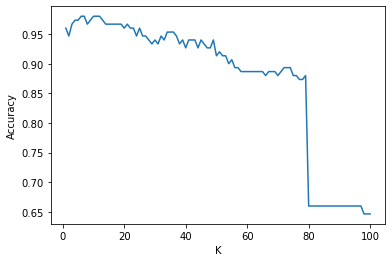

In [6]:
plt.plot(Ks, vals)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

### 5) Für welche Werte von K ist die Genauigkeit maximal?

In [7]:
print("Maximale Genauigkeit", vals.max(), "für K =", np.argmax(vals) + 1)

Maximale Genauigkeit 0.9800000000000001 für K = 6


### 6) Interpretieren Sie den Plot hinsichtlich möglicher Über- und Unteranpassung

Ab `K = ~60` wird das Modell sehr ungenau (Unteranpassung). Die sehr hohe Genauigkeit von 98% (K=1, 2) lässt auf eine Überanpassung schließen. D.h. ein guter Wert für `K` liegt bei 10 oder 11 die auch die maximale Genauigkeit aufweisen.